In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
weather=pd.read_csv('/content/weather_data.csv')

In [ ]:
weather.head()


,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


In [ ]:
weather.tail()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
912688,1017109,Fatehabad,1271934,29.52,75.45,2020-04-05 20:30:00+05:30,28.68,28.68,28.68,1008,1008,984,18,Clear,clear sky,3,1.59,271,North\n,Haryana
912689,1017110,Fatehabad,1271934,29.52,75.45,2020-04-05 23:30:00+05:30,25.64,25.64,25.64,1009,1009,984,23,Clear,clear sky,2,4.11,57,North\n,Haryana
912690,1017111,Fatehabad,1271934,29.52,75.45,2020-04-06 02:30:00+05:30,23.43,23.43,23.43,1007,1007,983,29,Clear,clear sky,0,2.87,62,North\n,Haryana
912691,1017112,Fatehabad,1271934,29.52,75.45,2020-04-06 05:30:00+05:30,22.56,22.56,22.56,1007,1007,982,29,Clear,clear sky,0,1.70,107,North\n,Haryana
912692,1017113,Fatehabad,1271934,29.52,75.45,2020-04-06 08:30:00+05:30,28.51,28.51,28.51,1009,1009,985,20,Clear,clear sky,0,2.03,175,North\n,Harya


In [ ]:
weather.dtypes


,0
id,int64
city_name,object
city_id,int64
latitude,float64
longitude,float64
dt_txt,object
temp,float64
temp_min,float64
temp_max,float64
pressure,int64


In [ ]:
pd.unique(weather['city_name'])

array(['Amarawati', 'Hardoi', 'Sirohi', 'Pratapgarh', 'Darjeeling',
       'Bilaspur', 'Etah', 'Hingoli', 'Jaipur', 'Anantapur', 'Dhenkanal',
       'Jaunpur', 'Mungeli', 'Panchkula', 'Palwal', 'Faridabad', 'Howrah',
       'Vijayanagaram', 'Aligarh', 'Dharwad', 'Jalgaon', 'Sonipat',
       'Bagalkot', 'Baghpat', 'Goalpara', 'Bellary', 'Cachar', 'Bikaner',
       'Narayanpur', 'Chamba', 'Dindori', 'Muktsar', 'Mahbubnagar',
       'Gadag', 'Marigaon', 'Srinagar', 'Shimla', 'Hoshangabad',
       'Lakhimpur', 'Bhind', 'Buldhana', 'Panna', 'Khammam', 'Balaghat',
       'Beed', 'Sambalpur', 'Kannur', 'Parbhani', 'Rajnandgaon', 'Unnao',
       'Nalgonda', 'Warangal', 'Firozabad', 'Mohali', 'Yavatmal',
       'Hyderabad', 'South District', 'Delhi', 'Jabalpur',
       'Muzaffarnagar', 'Pali', 'Korba', 'Alirajpur', 'Indore', 'Mandya',
       'Ahmednagar', 'Surajpur', 'Karimganj', 'Ghazipur', 'Bahraich',
       'Ariyalur', 'Dewas', 'Thanjavur', 'Udaipur', 'Agra', 'Medak',
       'Rohtak', 'Barga

In [ ]:
pd.unique(weather['state'])

array(['Maharashtra', 'Uttar Pradesh', 'Rajasthan', 'West Bengal',
       'Chattisgarh', 'Andhra Pradesh', 'Odisha', 'Haryana', 'Karnataka',
       'Assam', 'Himachal Pradesh', 'Madhya Pradesh', 'Punjab',
       'Telangana', 'Jammu and Kashmir', 'Kerala', 'Tripura',
       'NCT of Delhi', 'Tamil Nadu', 'Nagaland', 'Uttrakhand', 'Gujarat',
       'Manipur', 'Jharkhand', 'Pondicherry', 'Mizoram', 'Harya'],
      dtype=object)

In [ ]:
weather.shape

(912693, 20)

In [ ]:
print(weather.isnull().sum())

id             0
city_name      0
city_id        0
latitude       0
longitude      0
dt_txt         0
temp           0
temp_min       0
temp_max       0
pressure       0
sea_level      0
grnd_level     0
humidity       0
main           0
description    0
clouds         0
wind_speed     0
wind_degree    0
region         0
state          0
dtype: int64


In [ ]:
weather=weather.dropna()
weather.count()

,0
id,912693
city_name,912693
city_id,912693
latitude,912693
longitude,912693
dt_txt,912693
temp,912693
temp_min,912693
temp_max,912693
pressure,912693


In [ ]:
duplicate_rows_weather = weather[weather.duplicated()]
print("number of duplicate rows: ", duplicate_rows_weather.shape)

number of duplicate rows:  (0, 20)


<Axes: >

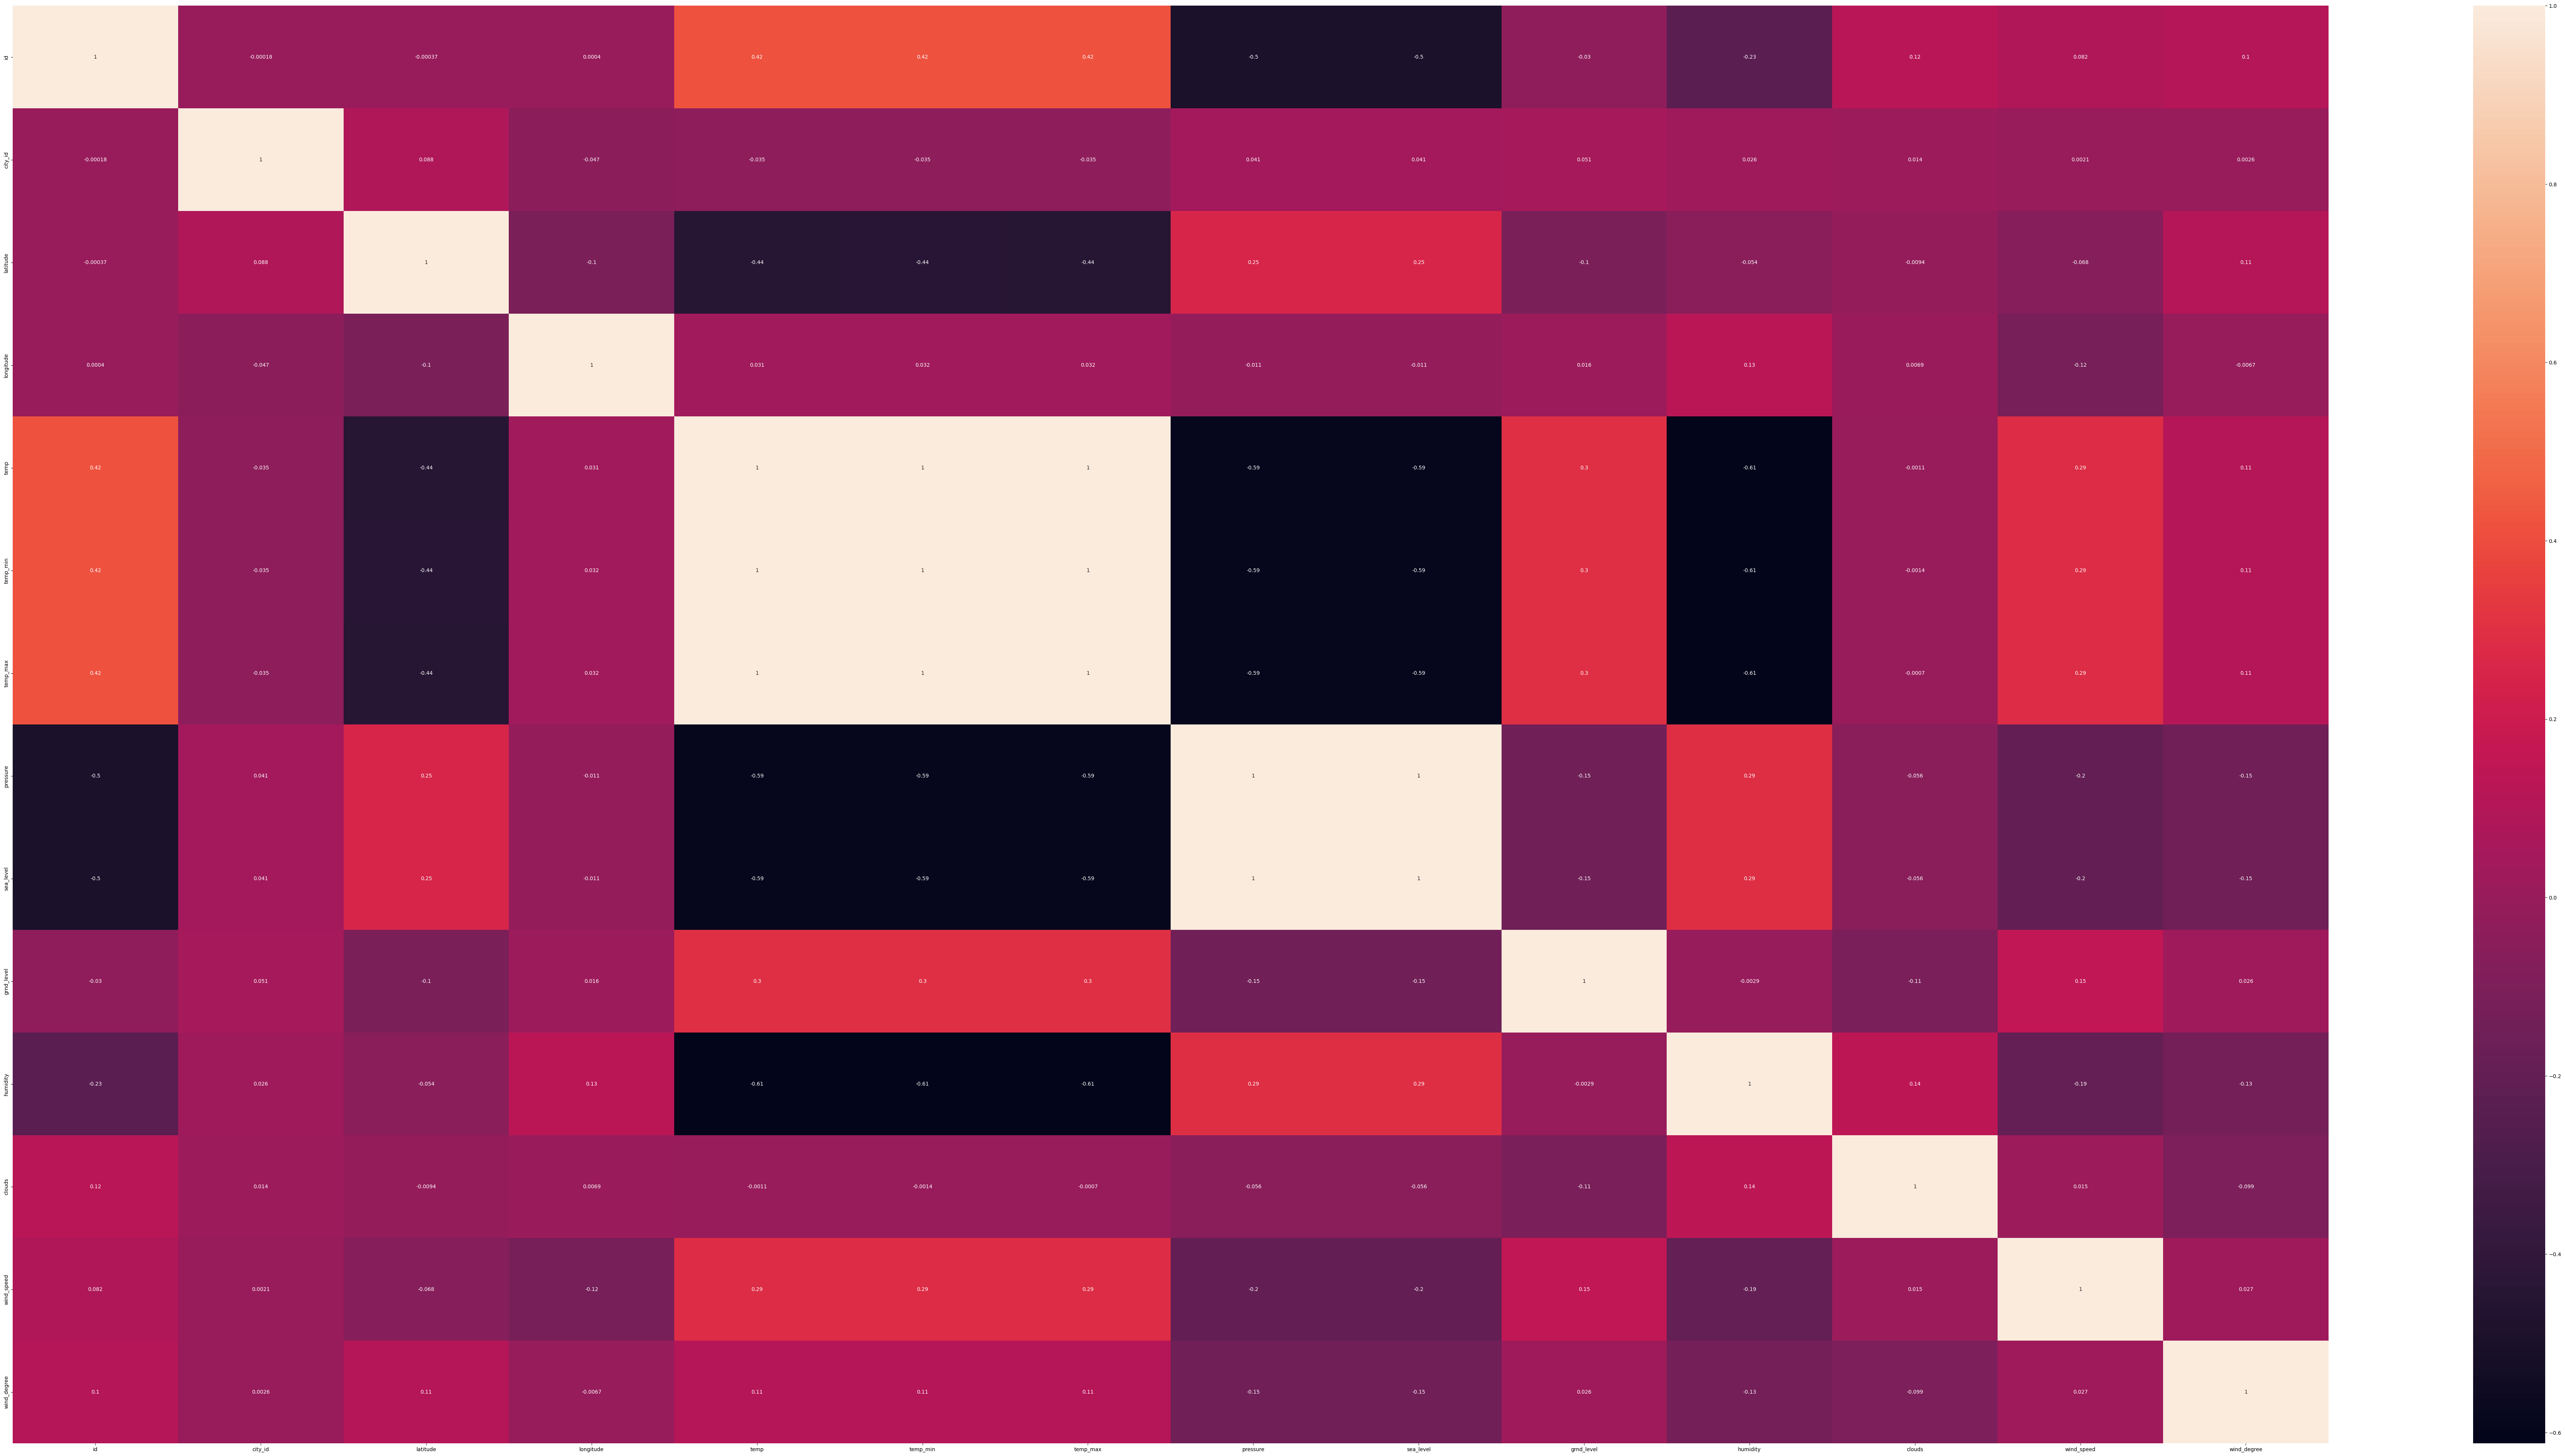

In [ ]:
plt.figure(figsize=(100,50))
c= weather.corr(numeric_only=True)
sns.heatmap(c,annot=True)



In [ ]:
y=weather["description"]

In [21]:
features=['temp','temp_min','temp_max','pressure','sea_level','grnd_level','humidity','clouds','wind_speed','wind_degree']
X=weather[features]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1728
[LightGBM] [Info] Number of data points in the train set: 730154, number of used features: 10
[LightGBM] [Info] Start training from score -2.211704
[LightGBM] [Info] Start training from score -0.627034
[LightGBM] [Info] Start training from score -2.630235
[LightGBM] [Info] Start training from score -8.253987
[LightGBM] [Info] Start training from score -12.114716
[LightGBM] [Info] Start training from score -2.676205
[LightGBM] [Info] Start training from score -6.871647
[LightGBM] [Info] Start training from score -5.147749
[LightGBM] [Info] Start training from score -2.304537
[LightGBM] [Info] Start training from score -2.226964
[LightGBM] [Info] Start training from score -7.335593
[LightGBM] [Warning] No further splits with positiv

Accuracy: 92.1967%
Confusion Matrix:
[[19465     0    26    65     1   586    16    62     4     9    63]
 [    0 96487    16     7     3   684     6    33     0     2     0]
 [    9    72 12749     8     0   175     4     9     2     0     0]
 [    2     0     0     2     0    22     0     8     4     2     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [ 2292  1691  1017    46     3  3095    23   224  2201  1926    33]
 [   26     3     9     2     0    13    43     4    73     9     0]
 [  117    26    22    17     1   445     3   160   133    65     7]
 [   89     0     0    49     0   987    60    72 16972    11    37]
 [   60    20    14    10     2   329    19    14     8 19322     4]
 [    9     0    12     9     4    20    38    13    21     2     0]]


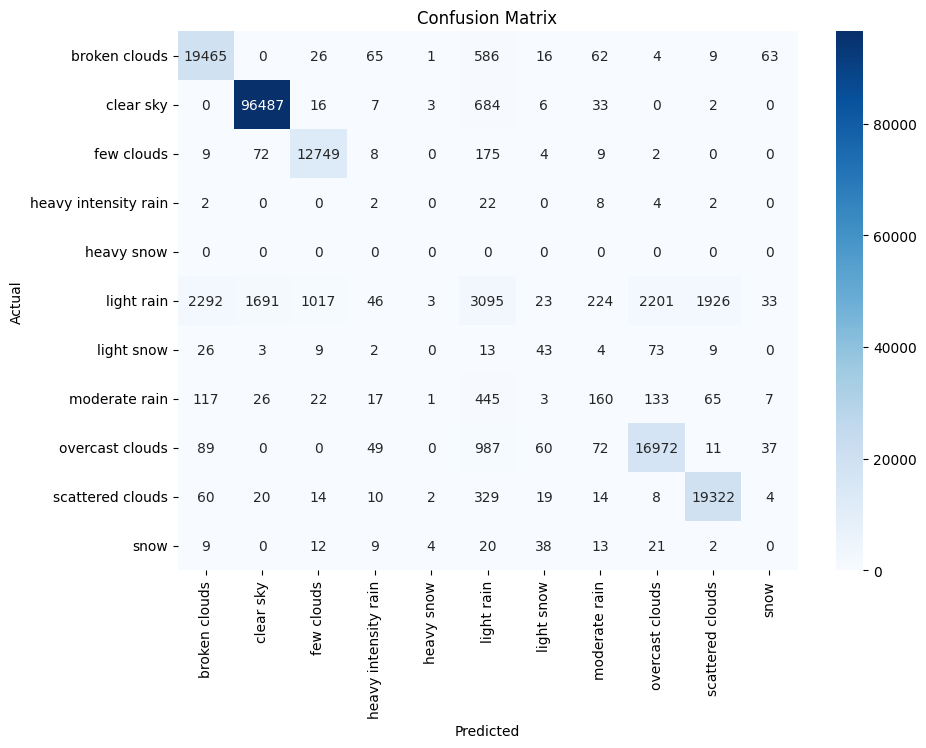

In [35]:

conf_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_mat)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
predictions = model.predict(X_test)
output = pd.DataFrame({ 'weather': predictions})
output.head()

,weather
0,clear sky
1,clear sky
2,clear sky
3,light rain
4,few clouds
